In [1]:
import numpy as np 
import seaborn as sns 
#darkmode 
sns.set_style("darkgrid")

In [2]:
x = np.random.uniform(0,1,1000)
y = 3 + 2*x + np.random.normal(0,0.1,1000)

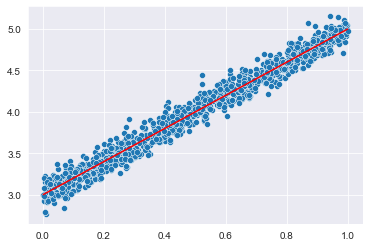

In [4]:
#plot x to y using seaborn
_ = sns.scatterplot(x=x,y=y)
#plot the line y = 3+2x with sns
_ = sns.lineplot(x=x,y=3+2*x,color="red")

In [5]:
#add a column of ones to x 
X = np.column_stack((np.ones(len(x)),x))
print(X.shape)

(1000, 2)


In [7]:
beta = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
print(beta)

[3.00713368 1.99204027]


It turns out the $\beta$ is distributed normal and has covariance matrix

$$\Sigma = \sigma^2 (X^T X)^{-1}$$



In [15]:
predicitions = np.dot(X,beta)
residuals = predicitions - y 
sample_variance = np.mean(residuals**2)
print(sample_variance**.5)

0.10221958918880651


In [16]:
Sigma = sample_variance * np.linalg.inv(np.dot(X.T,X))
print(Sigma)

[[ 4.04286037e-05 -6.12524736e-05]
 [-6.12524736e-05  1.25146619e-04]]


In [17]:
beta[0]

3.0071336779166176

In [18]:
sigma_0 = Sigma[0,0]**.5
print(sigma_0)

0.0063583491309773055


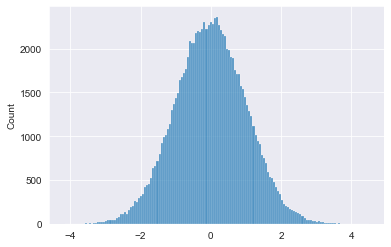

In [20]:
samples_t = np.random.standard_t(999,size=100_000)
#plot the samples with sns 
_ = sns.histplot(data = samples_t)

In [21]:
#get the .975 quantile 
t_975 = np.quantile(samples_t,0.975)
print(t_975)


1.9515993294213188


In [22]:
#compute the confidence interval
beta_0 = beta[0]
beta_0_lower = beta_0 - t_975*sigma_0
beta_0_upper = beta_0 + t_975*sigma_0
print(beta_0_lower,beta_0_upper)

2.994724728016376 3.0195426278168593


In [23]:
#use statsmodels for linear regression
import statsmodels.api as sm


model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.165e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:47:58   Log-Likelihood:                 861.69
No. Observations:                1000   AIC:                            -1719.
Df Residuals:                     998   BIC:                            -1710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0071      0.006    472.469      0.0